In [1]:
from scipy import stats
import statsmodels.api as smf

In [2]:
import pandas as pd
import numpy as np

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import warnings

warnings.filterwarnings('ignore')

### Q1.
* A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. 
A randomly selected sample of cutlets was collected from both units and measured? Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions.

In [ ]:
# H0 :muA - muB = 0       no diff in the diameter of the cutlet between two units
# HA: muA - muB !=0       yes there is diff

In [5]:
cutlets = pd.read_csv('Cutlets.csv')

In [6]:
cutlets.head()

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


In [7]:
stats.ttest_ind(cutlets['Unit A'],cutlets['Unit B'],alternative='two-sided')

Ttest_indResult(statistic=0.7228688704678063, pvalue=0.4722394724599501)

In [ ]:
# p value is very high, so for 5 % significance level we can't reject the H0

# so we have not enough evidence to say there is difference in the diameter of the cutlet between two units
# based on this we say diameters are equal

In [ ]:
# visualization of distribution

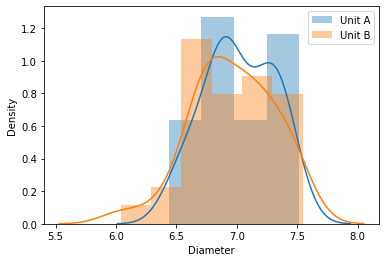

In [8]:
sns.distplot(cutlets['Unit A'],label='Unit A')
sns.distplot(cutlets['Unit B'],label='Unit B')
plt.xlabel('Diameter')
plt.legend()

### Q2. ANOVA 
*A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch. Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.

In [ ]:
# H0 : TAT lab1 = Lab2 = Lab3 = Lab4 
# H1 : atleast 1 lab has diff TAT

In [9]:
tat=pd.read_csv('LabTAT.csv')

In [10]:
tat.head()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


In [11]:
stats.f_oneway(tat['Laboratory 1'],tat['Laboratory 2'],tat['Laboratory 3'],tat['Laboratory 4'])

F_onewayResult(statistic=118.70421654401437, pvalue=2.1156708949992414e-57)

In [ ]:
# p value is low means F value is very high i.e inter dist b/w grps is very high
# reject the null hypothesis i.e. TAT is same across 4 lab - reject

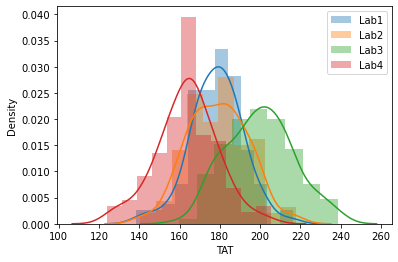

In [12]:
sns.distplot(tat['Laboratory 1'],label='Lab1')
sns.distplot(tat['Laboratory 2'],label='Lab2')
sns.distplot(tat['Laboratory 3'],label='Lab3')
sns.distplot(tat['Laboratory 4'],label='Lab4')

plt.xlabel('TAT')
plt.legend()

### Q3. Chi Squared Test

*Sales of products in four different regions is tabulated for males and females. Find if male-female buyer ratios are similar across regions.
         East   West   North     South
Males     50    142     131       70
Females  550    351     480       350

In [ ]:
# H0 : Males & Females are independent        
# HA : Males & Females are dependent

In [13]:
from scipy.stats import chi2_contingency

In [14]:
data= [[50,142,131,70],[550,351,480,350]]

stats,p,dof,expected = chi2_contingency(data)

print('p value is -', p)
alpha = 0.05 # significance level
if p<alpha:
    print('we reject Null Hypothesis as it is less than alpha - They are dependent')
else:
    print('We accept Null Hypothesis as it is greater than alpha - - They are independent')

p value is - 2.682172557281901e-17
we reject Null Hypothesis as it is less than alpha - They are dependent


In [15]:
stats

80.27295426602495

In [16]:
p 

2.682172557281901e-17

In [17]:
dof

3

In [18]:
expected

array([[111.01694915,  91.21892655, 113.05225989,  77.71186441],
       [488.98305085, 401.78107345, 497.94774011, 342.28813559]])

### Q4 .
* TeleCall uses 4 centers around the globe to process customer order forms. They audit a certain % of the customer order forms. Any error in order form renders it defective and has to be reworked before processing. The manager wants to check whether the defective % varies by centre. Please analyze the data at 5% significance level and help the manager draw appropriate inferences

In [ ]:
# H0 : inDependent
# H1 : Dependent  

In [19]:
order = pd.read_csv('Costomer Order Form.csv')

In [20]:
order.head()

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free


In [21]:
order['Phillippines'].value_counts()

Error Free    271
Defective      29
Name: Phillippines, dtype: int64

In [22]:
error_free = []
defective = []

for i in range(4):
    e=0
    d=0
    for j in order.iloc[:,i]:
        if j == 'Error Free':
            e+=1
        else:
            d+=1
    error_free.append(e)
    defective.append(d)

In [23]:
error_free

[271, 267, 269, 280]

In [24]:
defective

[29, 33, 31, 20]

In [25]:
tele_call = np.array([error_free,defective])
tele_call

array([[271, 267, 269, 280],
       [ 29,  33,  31,  20]])

In [26]:
stats,p,dof,expected = chi2_contingency(tele_call)

print('p value is -', p)
alpha = 0.05 # significance level
if p<alpha:
    print('we reject Null Hypothesis as it is less than alpha - They are dependent')
else:
    print('We accept Null Hypothesis as it is greater than alpha - - They are independent')

p value is - 0.2771020991233135
We accept Null Hypothesis as it is greater than alpha - - They are independent


In [27]:
print('Stats - ',stats)
print('p value - ',p)
print('dof are - ',dof)
print('expected array - ',expected)

Stats -  3.858960685820355
p value -  0.2771020991233135
dof are -  3
expected array -  [[271.75 271.75 271.75 271.75]
 [ 28.25  28.25  28.25  28.25]]
